# Baseball Case Study

Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from scipy import stats
import os

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [3]:
df.shape

(30, 17)

In [4]:
df.columns.tolist()

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

In [5]:
#To find the missing value & their percentages
def missing_data(data):
    percentage_missing = data.isnull().sum()*100/len(data)
    data_types= data.dtypes
    missing_values = pd.DataFrame({"data_types": data_types,
                                  "%_missing": percentage_missing})
    return missing_values

missing_data(df)

data_types  %_missing
W        int64        0.0
R        int64        0.0
AB       int64        0.0
H        int64        0.0
2B       int64        0.0
3B       int64        0.0
HR       int64        0.0
BB       int64        0.0
SO       int64        0.0
SB       int64        0.0
RA       int64        0.0
ER       int64        0.0
ERA    float64        0.0
CG       int64        0.0
SHO      int64        0.0
SV       int64        0.0
E        int64        0.0

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Obsevation:
The dataset looks okay as there is no missing value thus no oderation is required.

<Axes: >

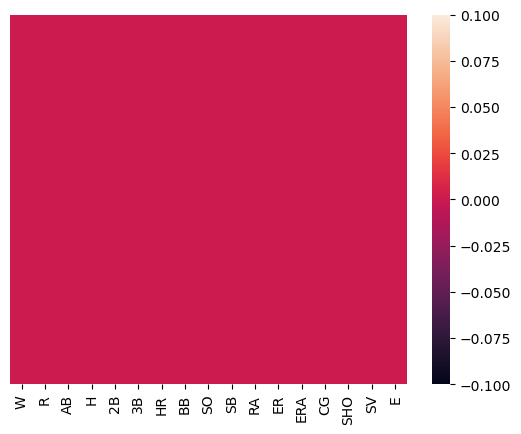

In [7]:
sns.heatmap(df.isnull(), yticklabels=False)

# Descriptive Analysis

In [8]:
#Basic statistics
df.describe()

W           R           AB            H          2B  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

              3B          HR          BB          SO          SB          RA  \
count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
mean   31.300000  163.633333  469.100000  1248.20000   83.500000  688.233333   
std    10.452355   31.823309   57.053725   103.75947   22.815225   72.108005   
min    13.000000  100.000000  375.000000   973.00000   44.000000  525.000000   
25%    23.000000  140.250000  428.250000  1157.50000   69.000000  636.250000   
50%    31.000000  158.500000  473.000000  1261.50000   83.500000  695.500000   
75%    39.000000  177.000000  501.250000  1311.50000   96.500000  732.500000   
max    49.000000  232.000000  570.000000  1518.00000  134.000000  844.000000   

               ER        ERA         CG        SHO         SV           E  
count   30.000000  30.000000  30.000000  30.000000  30.000000   30.000000  
mean   635.833333   3.956333   3.466667  11.300000  43.066667   94.333333  
std     70.140786   0.454089   2.763473   4.120177   7.869335   13.958889  
min    478.000000   2.940000   0.000000   4.000000  28.000000   75.000000  
25%    587.250000   3.682500   1.000000   9.000000  37.250000   86.000000  
50%    644.500000   4.025000   3.000000  12.000000  42.000000   91.000000  
75%    679.250000   4.220000   5.750000  13.000000  46.750000   96.750000  
max    799.000000   5.040000  11.000000  21.000000  62.000000  126.000000

<Axes: >

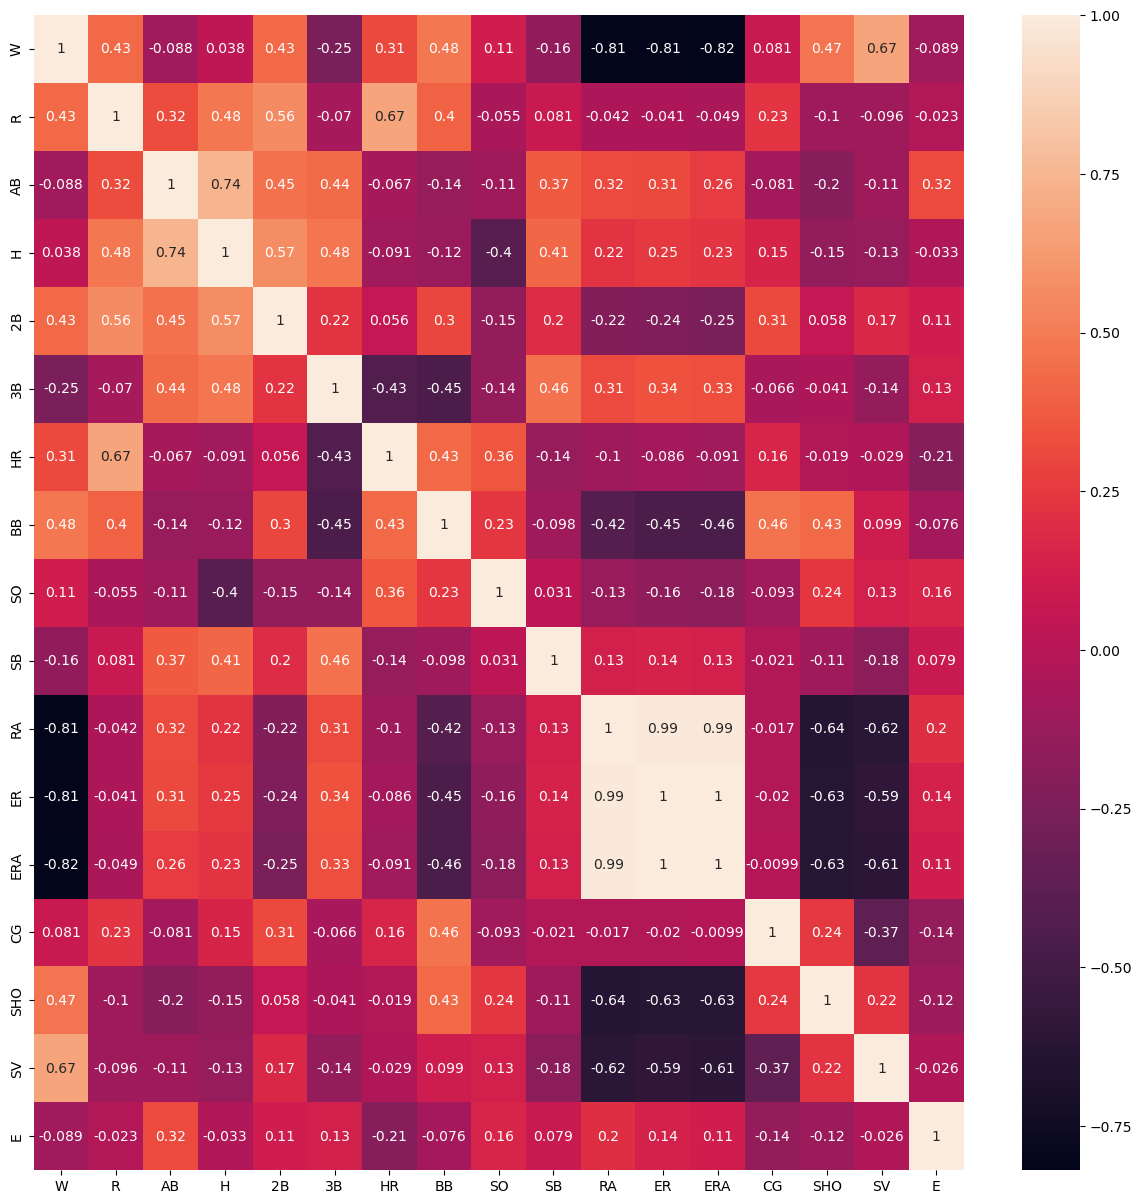

In [9]:
# looking at the correlation and plot heatmap
correlation = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True)

Observations:
There is a strong correlation between AB and H, RA and ER, RA and ERA, HR and R. This will considered for further findings on model creation as collinearity might complicate model estimation.
Explanotry variables need to be independent from each other and thus, try to avoid adding explanotry variables that are strongly correlated to each other.

In [10]:
#Correlation with target variable - (W) the number of Wins credited to a pitcher
correlation["W"].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

From the correlation matrix, we can observe that most correlated attributes with our response variable WINS for a baseball team are; SV 66%, BB 48%, SHO 47%, R 43%, 2B 42%, HR 30%, and SO 11%

In [11]:
# seperating batting, base running, pitching and fielding
batting = df[['H', '2B', '3B','SV', 'R', 'AB',
                 'HR', 'BB', 'SO']]
baserun = df[['SB', 'R']]
pitching = df[['H', 'HR', 'BB','CG','SO', 'SV', 'RA','ERA']]
fielding = df[['E']]

<Figure size 1500x1500 with 0 Axes>

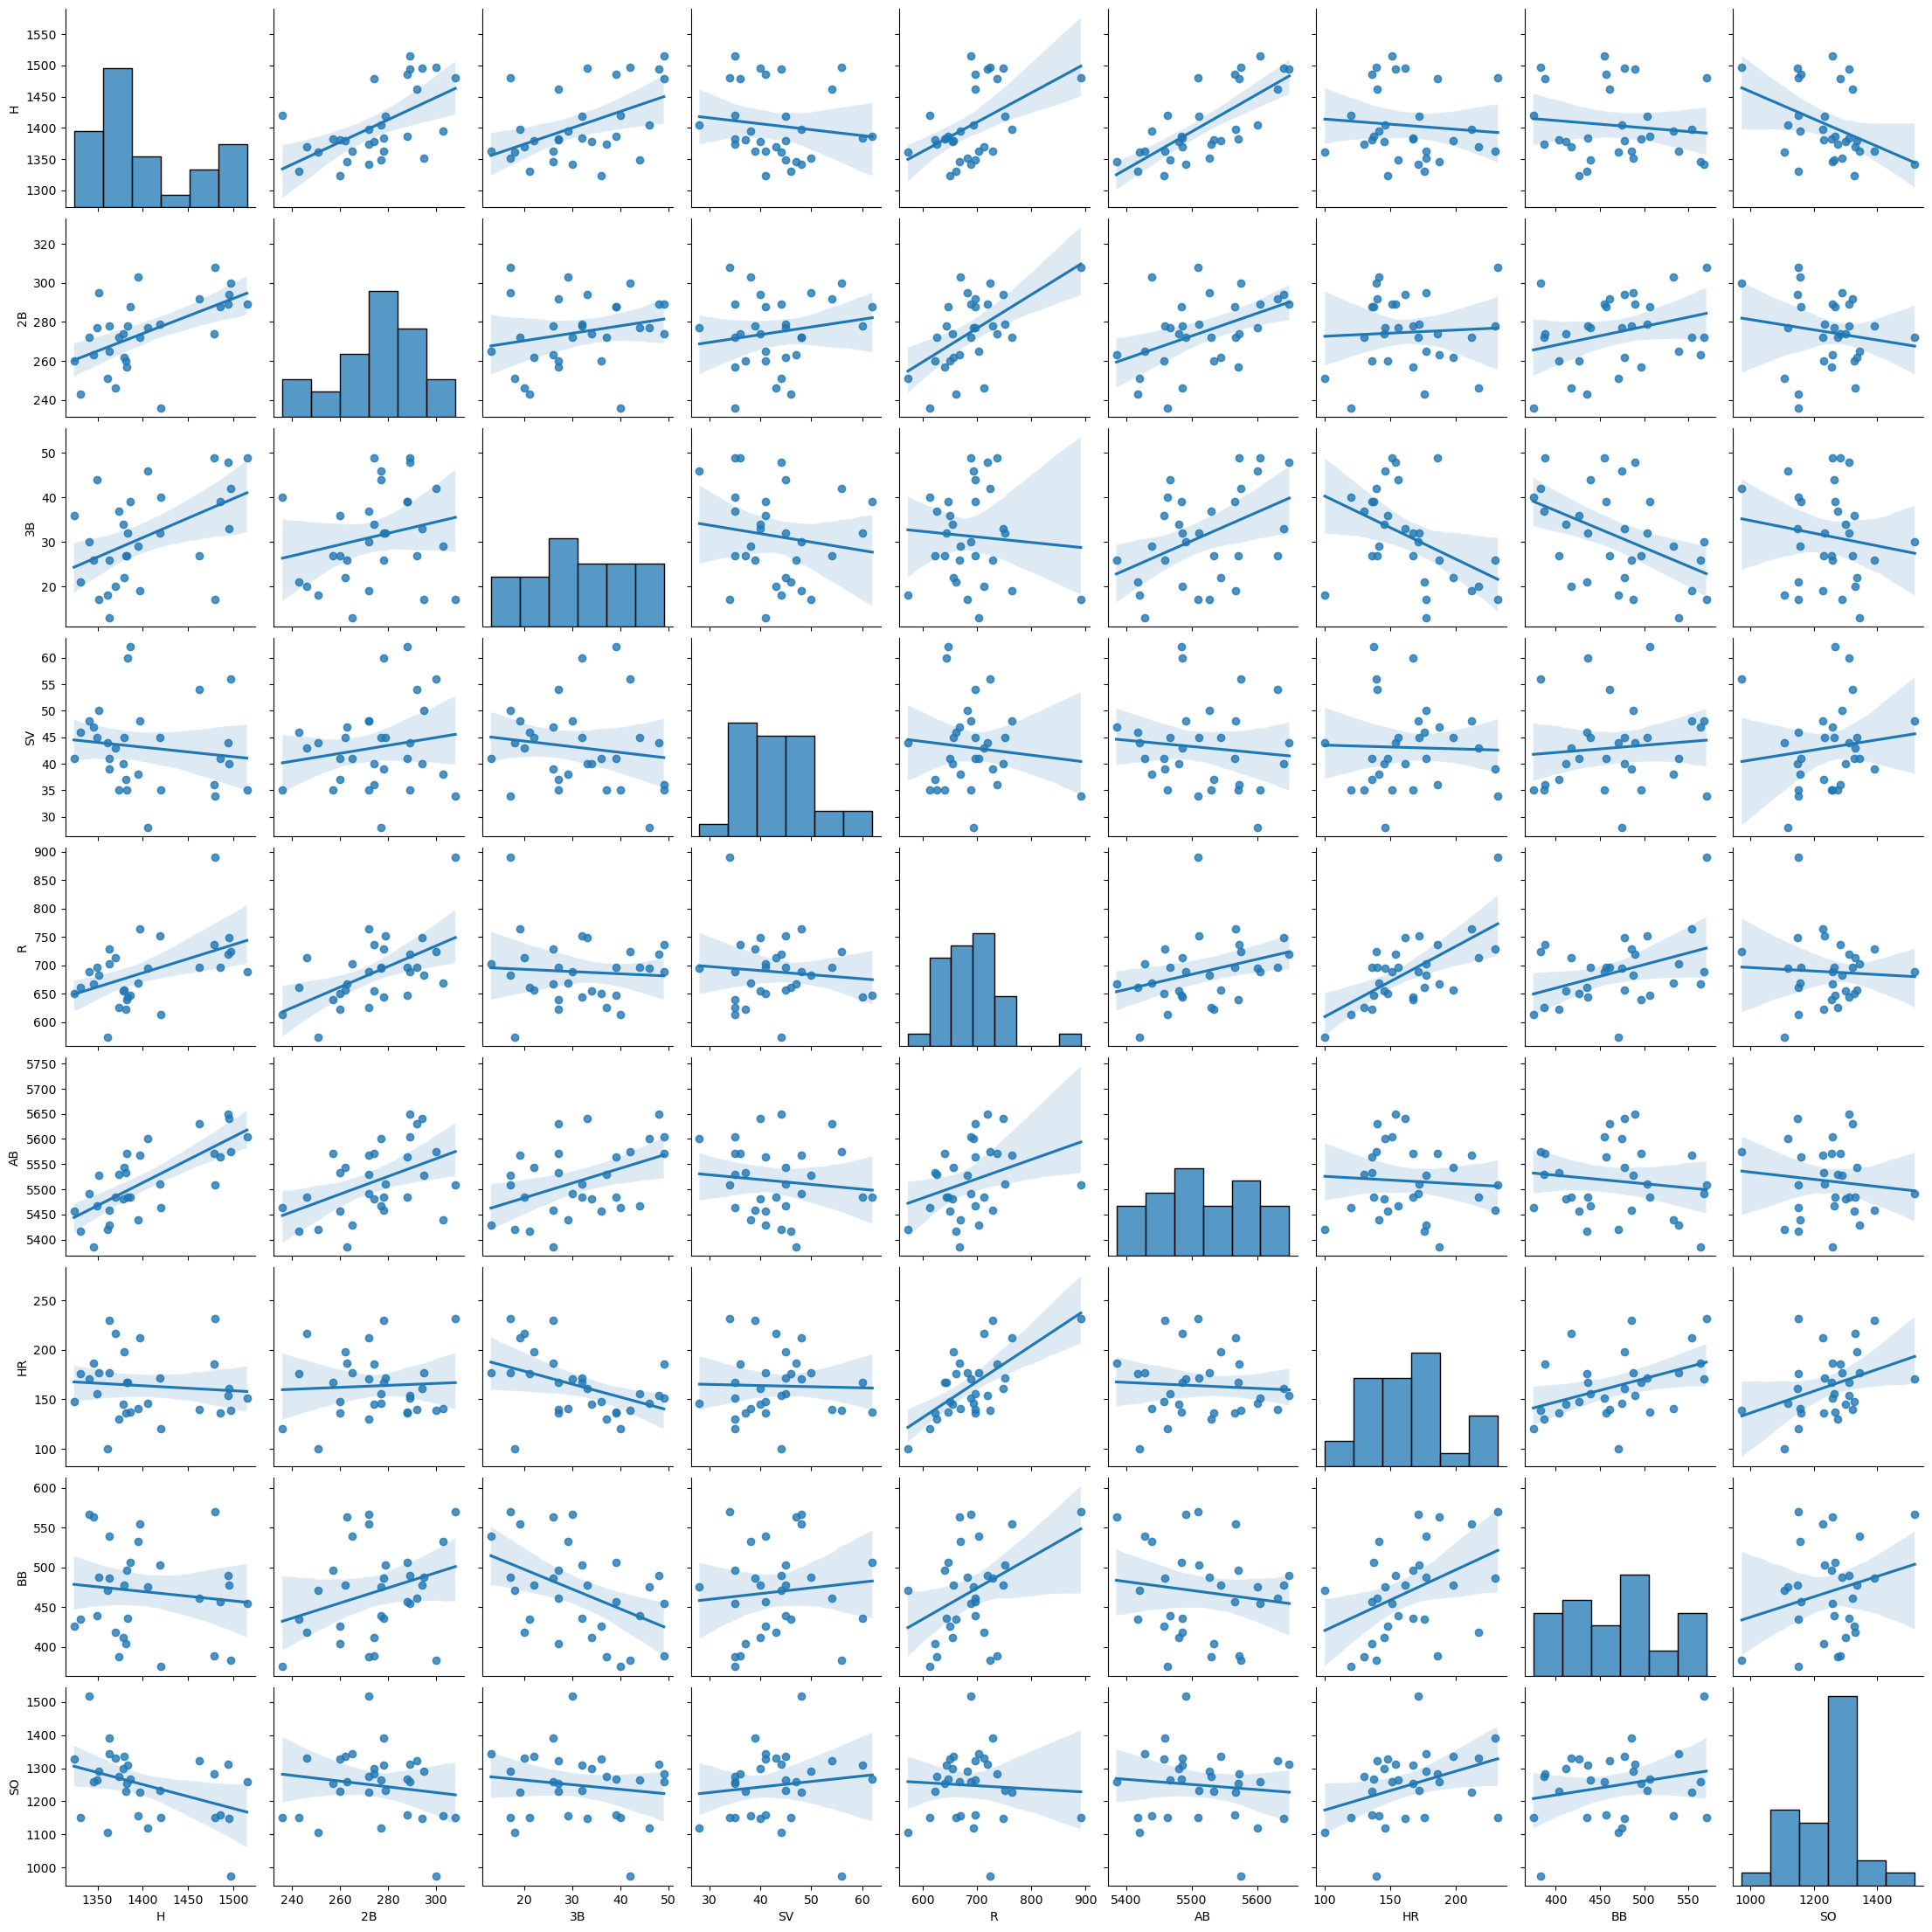

In [12]:
# looking at batting
plt.figure(figsize=(15,15))
sns.pairplot(batting, kind="reg")

it can see that the response variable WINS, H, 2B, BB, R and  AB are normaly distributed. HR and BB on the other hand are bimodal.

<Figure size 1500x1500 with 0 Axes>

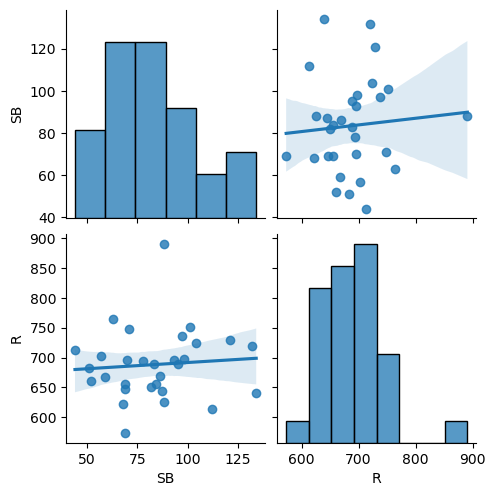

In [13]:
# looking at baserun
plt.figure(figsize=(15,15))
sns.pairplot(baserun, kind="reg")

SB is rightly distributed unlike R that's bimodal

<Figure size 1500x1500 with 0 Axes>

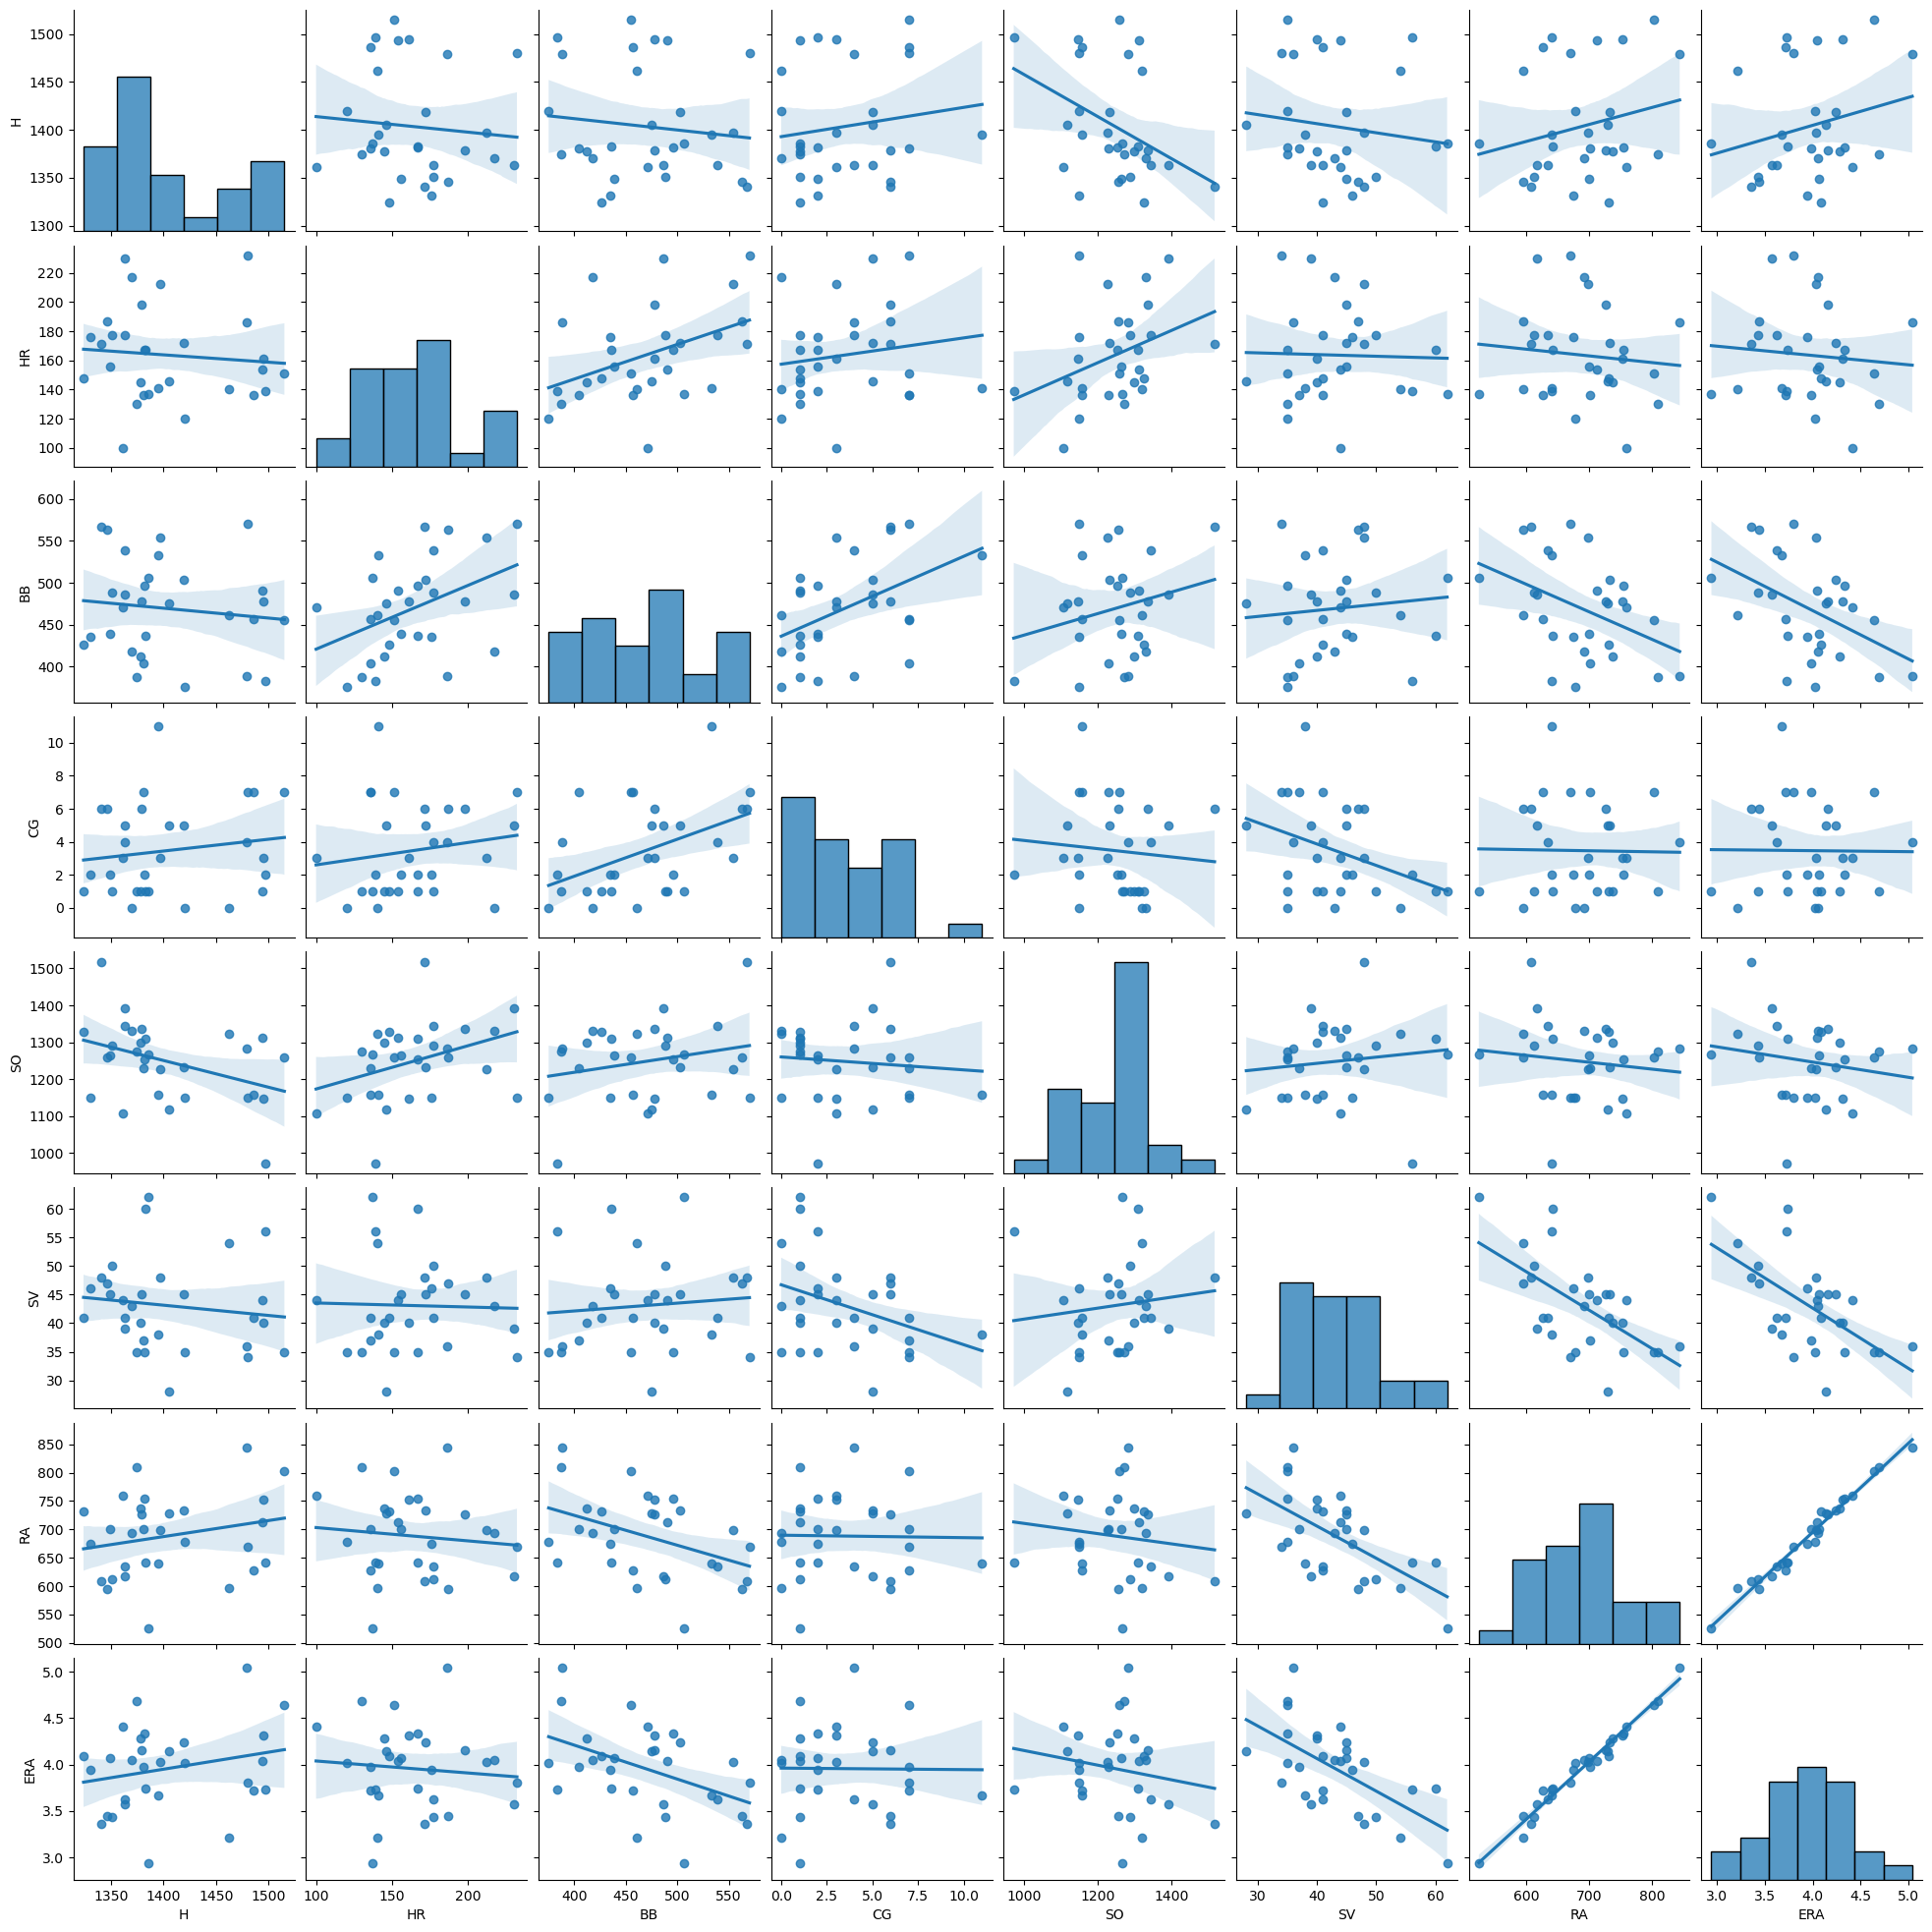

In [14]:
# looking at pitching
plt.figure(figsize=(15,15))
sns.pairplot(pitching, kind="reg")

<Figure size 2000x2000 with 0 Axes>

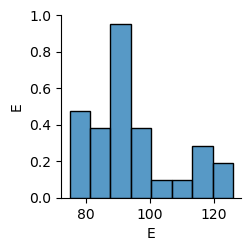

In [15]:
# looking at fielding
plt.figure(figsize=(20,20))
sns.pairplot(fielding, kind="reg")

E is distributed normally

In [16]:
# checking the skewness value of the variables
for column in df.columns.values.tolist():
    print(column)
    print(df[column].skew())
    print()

W
0.047088688953686085

R
1.2007863569707353

AB
0.18343655908507983

H
0.6702537173217267

2B
-0.23064991757259148

3B
0.129502450836424

HR
0.5164407366297173

BB
0.15849848440330838

SO
-0.1560654813644833

SB
0.4798928679573835

RA
0.04573397531336112

ER
0.05870979570981254

ERA
0.053331339494040286

CG
0.7368452725826206

SHO
0.5657904298216165

SV
0.6575235461553925

E
0.8901318267689016



In [17]:
#visualizing the distribution of each variable - using histogram
for column in df:
    fig=px.histogram(df, x=df[column])
    fig.show()

In [18]:
#Visualizing the distribution of each variable - using boxplot
for column in df:
    fig=px.box(df, y=df[column])
    fig.show()

In [19]:
#creating a model using all variables.
# feature selection (select all)
X = df[['R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV', 'E']]
y = df.W

In [20]:
# using all features
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      W   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              1018.
Date:                Sun, 22 Oct 2023   Prob (F-statistic):                    1.18e-18
Time:                        13:51:51   Log-Likelihood:                         -68.728
No. Observations:                  30   AIC:                                      169.5
Df Residuals:                      14   BIC:                                      191.9
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
R              0.1392      0.037      3.714      0.002       0.059       0.220
AB             0.0130      0.008      1.721      0.107      -0.003       0.029
H             -0.0185      0.031     -0.594      0.562      -0.085       0.048
2B            -0.1381      0.070     -1.978      0.068      -0.288       0.012
3B         -2.595e-05      0.111     -0.000      1.000      -0.237       0.237
HR            -0.0696      0.065     -1.074      0.301      -0.209       0.069
BB            -0.0289      0.022     -1.302      0.214      -0.077       0.019
SO             0.0027      0.010      0.269      0.792      -0.019       0.025
SB            -0.0028      0.040     -0.072      0.944      -0.088       0.082
RA             0.1074      0.121      0.886      0.390      -0.153       0.367
ER            -0.1368      0.223     -0.613      0.550      -0.615       0.342
ERA           -6.5032     24.638     -0.264      0.796     -59.346      46.340
CG             1.0361      0.378      2.744      0.016       0.226       1.846
SHO            0.3440      0.293      1.174      0.260      -0.284       0.972
SV             0.7951      0.160      4.975      0.000       0.452       1.138
E             -0.0416      0.065     -0.638      0.533      -0.181       0.098
==============================================================================
Omnibus:                        5.157   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                3.493
Skew:                          -0.752   Prob(JB):                        0.174
Kurtosis:                       3.729   Cond. No.                     2.30e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this model, it can see that the R-squared is significantly high at 0.99, whih means the model can be explained the relationship by 99% accuracy.

# Model Prediction - Linear Regression

In [21]:
# use only the 5 significant variables we identified earlier from the correlation matrix
X2 = df[["SV",
              "BB",
              "SHO",
              "R",
              "2B"]]
model_2 = sm.OLS(y, X2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      W   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              1574.
Date:                Sun, 22 Oct 2023   Prob (F-statistic):                    2.18e-30
Time:                        13:51:51   Log-Likelihood:                         -88.303
No. Observations:                  30   AIC:                                      186.6
Df Residuals:                      25   BIC:                                      193.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SV             0.7806      0.123      6.324      0.000       0.526       1.035
BB             0.0085      0.021      0.409      0.686      -0.034       0.051
SHO            0.8713      0.269      3.234      0.003       0.316       1.426
R              0.0786      0.021      3.705      0.001       0.035       0.122
2B            -0.0744      0.055     -1.351      0.189      -0.188       0.039
==============================================================================
Omnibus:                        0.216   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.417
Skew:                          -0.087   Prob(JB):                        0.812
Kurtosis:                       2.449   Cond. No.                         259.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using the most correlated variables to cross check the Model. It is seen as well that the accuracy remains 99%.

In [22]:
# spliting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, y_test.shape)

(30, 16) (24, 16) (6,)


In [23]:
prediction = model.predict(X_test)
prediction[0:5]

1     82.363975
0     93.933698
14    72.133047
9     79.442985
21    85.543855
dtype: float64

# Applying the linear regression model to the test dataset and see predictions.

In [24]:
#checking the prediction with original value
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

Predicted  Original
1   82.363975        83
0   93.933698        95
14  72.133047        68
9   79.442985        78
21  85.543855        83
19  63.642382        64

# Conclusion